acceso al colab del tp de la asignatura >> https://colab.research.google.com/drive/1tDlgALGTmapvhNKS50WKtEiNDhGJSCKj#scrollTo=SjvhTH_ZrWAX

# 1a Implementación del Gradiente Descendente (1 punto)
Implementar el algoritmo del Gradiente Descendente (GD) para minimizar  J(w,b) .
Utilizar 100 épocas y 3 diferentes learning rates (0.1, 0.01, 0.001).
Inicializar valores de  w  y  b  de manera aleatoria con np.random.randn() para cada learning rate.
Graficar la función de Costo  J(w,b)  VS número de época

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como numpy, scipy, matplotlib o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

LR=   0.1 -> w=3.2280, b=3.9296, J_final=0.5085
LR=  0.01 -> w=3.6903, b=2.1044, J_final=1.6127
LR= 0.001 -> w=1.3806, b=-0.8720, J_final=22.6669


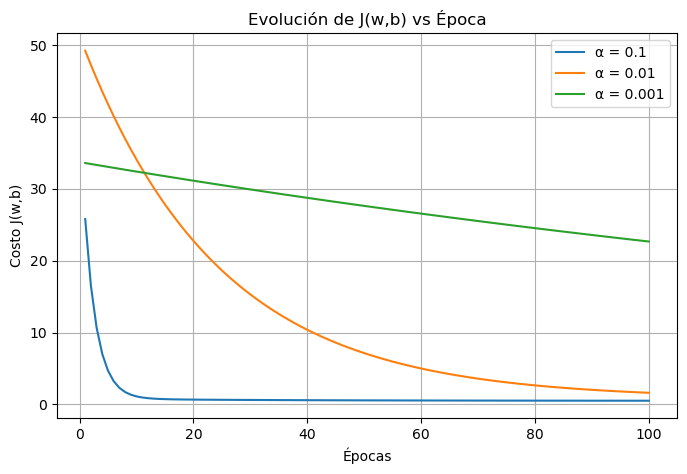

In [9]:
def compute_cost(w, b, X, y):
    m = X.shape[0]
    predictions = w * X + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradients(w, b, X, y):
    m = X.shape[0]
    predictions = w * X + b
    error = predictions - y
    dw = (1 / m) * np.dot(error, X)
    db = (1 / m) * np.sum(error)
    return dw, db

def gradient_descent(X, y, alpha, epochs):
    # Inicialización aleatoria
    w = np.random.randn()
    b = np.random.randn()
    cost_history = []

    for epoch in range(epochs):
        dw, db = compute_gradients(w, b, X, y)
        w -= alpha * dw
        b -= alpha * db
        cost_history.append(compute_cost(w, b, X, y))
    return w, b, cost_history

# Generamos datos de ejemplo
np.random.seed(0)
m = 100
X = 2 * np.random.rand(m)
y = 4 + 3 * X + np.random.randn(m)  # pendiente=3, intersección=4

# Parámetros de experimento
learning_rates = [0.1, 0.01, 0.001]
epochs = 100

# Ejecutamos GD para cada learning rate
histories = {}
for lr in learning_rates:
    w_opt, b_opt, cost_hist = gradient_descent(X, y, lr, epochs)
    histories[lr] = cost_hist
    print(f"LR={lr:>6} -> w={w_opt:.4f}, b={b_opt:.4f}, J_final={cost_hist[-1]:.4f}")

# Graficamos evolución de la función de costo
plt.figure(figsize=(8, 5))
for lr, cost_hist in histories.items():
    plt.plot(range(1, epochs+1), cost_hist, label=f"α = {lr}")
plt.title("Evolución de J(w,b) vs Época")
plt.xlabel("Épocas")
plt.ylabel("Costo J(w,b)")
plt.legend()
plt.grid(True)
plt.show()


# 1b Implementación de Adam (1 punto)
Implementar el algoritmo de Adam para minimizar  J(w,b) .
Utilizar 100 épocas y 3 diferentes learning rates (0.1, 0.01, 0.001).
Utilizar los mismos valores de  w  y  b  que se usaron para GD para cada diferente learning rate.
Graficar la función de Costo  J(w,b)  VS número de época
Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).


Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como numpy, scipy, matplotlib o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [10]:
def compute_cost(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    return (1/(2*m)) * np.sum((preds - y)**2)

def compute_gradients(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    error = preds - y
    dw = (1/m) * np.dot(error, X)
    db = (1/m) * np.sum(error)
    return dw, db

In [11]:
# Generar datos de ejemplo
np.random.seed(0)
m = 100
X = 2 * np.random.rand(m)
y = 4 + 3 * X + np.random.randn(m)

# Learning rates y almacenamiento de w0,b0
learning_rates = [0.1, 0.01, 0.001]
initial_params = {}
for lr in learning_rates:
    w0 = np.random.randn()
    b0 = np.random.randn()
    initial_params[lr] = (w0, b0)


In [12]:
def adam_full_batch(X, y, w0, b0, alpha, epochs,
                    beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = v_w = v_b = 0
    cost_history = []
    t = 0

    for epoch in range(1, epochs + 1):
        t += 1
        dw, db = compute_gradients(w, b, X, y)

        # Primer y segundo momento
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Corrección de sesgo
        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        # Actualización de parámetros
        w -= alpha * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b -= alpha * m_b_hat / (np.sqrt(v_b_hat) + eps)

        cost_history.append(compute_cost(w, b, X, y))

    return w, b, cost_history


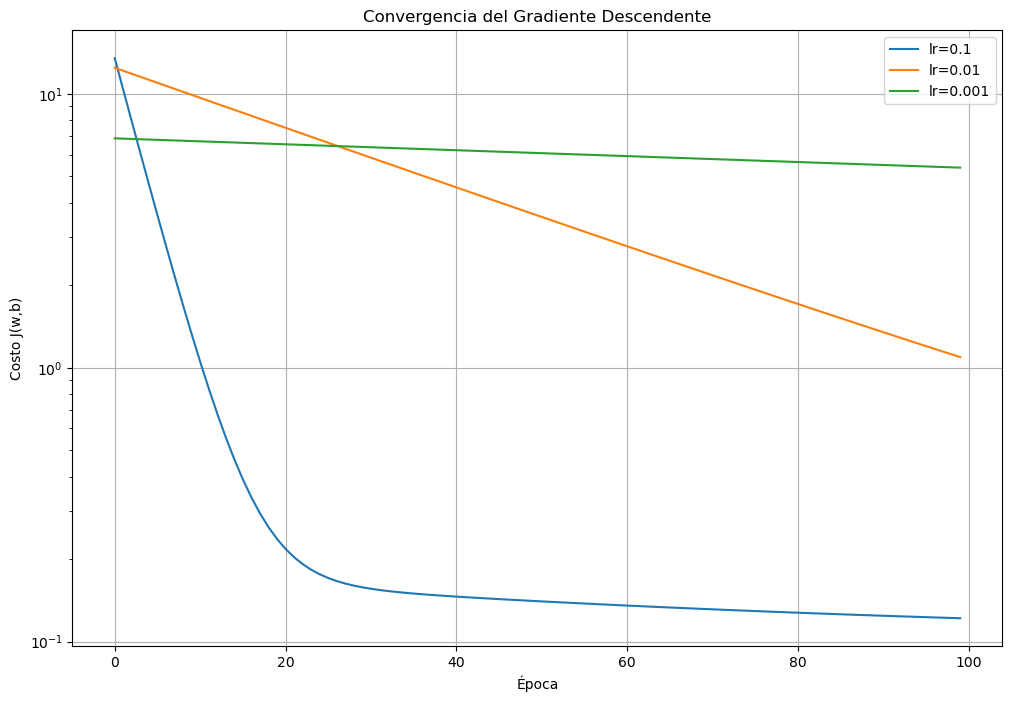

In [13]:

# Generar datos sintéticos
np.random.seed(42)
m = 100
X = np.linspace(0, 1, m).reshape(-1, 1)
y_true = 2 * X + 3
y = y_true + np.random.normal(0, 0.5, size=y_true.shape)

# Hiperparámetros
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

# Configuración de gráficos
plt.figure(figsize=(12, 8))

# Entrenamiento para cada learning rate
for lr in learning_rates:
    # Inicialización aleatoria de parámetros
    w = np.random.randn()
    b = np.random.randn()
    
    cost_history = []
    
    # Algoritmo de Gradiente Descendente
    for epoch in range(epochs):
        # Predicción
        y_pred = w * X + b
        
        # Cálculo de error y costo
        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        
        # Cálculo de gradientes
        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)
        
        # Actualización de parámetros
        w -= lr * dw
        b -= lr * db
    
    # Gráfico de convergencia
    plt.plot(range(epochs), cost_history, label=f'lr={lr}')

# Personalización del gráfico
plt.xlabel('Época')
plt.ylabel('Costo J(w,b)')
plt.title('Convergencia del Gradiente Descendente')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

In [14]:
def compute_cost(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    return (1/(2*m)) * np.sum((preds - y)**2)

def compute_gradients(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    error = preds - y
    dw = (1/m) * np.dot(error, X)
    db = (1/m) * np.sum(error)
    return dw, db

In [15]:
# Generar datos de ejemplo
np.random.seed(0)
m = 100
X = 2 * np.random.rand(m)
y = 4 + 3 * X + np.random.randn(m)

# Learning rates y almacenamiento de w0,b0
learning_rates = [0.1, 0.01, 0.001]
initial_params = {}
for lr in learning_rates:
    w0 = np.random.randn()
    b0 = np.random.randn()
    initial_params[lr] = (w0, b0)


In [16]:
def adam_full_batch(X, y, w0, b0, alpha, epochs,
                    beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = v_w = v_b = 0
    cost_history = []
    t = 0

    for epoch in range(1, epochs + 1):
        t += 1
        dw, db = compute_gradients(w, b, X, y)

        # Primer y segundo momento
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Corrección de sesgo
        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        # Actualización de parámetros
        w -= alpha * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b -= alpha * m_b_hat / (np.sqrt(v_b_hat) + eps)

        cost_history.append(compute_cost(w, b, X, y))

    return w, b, cost_history


In [17]:
def adam_mini_batch(X, y, w0, b0, alpha, epochs, batch_size=20,
                    beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = v_w = v_b = 0
    cost_history = []
    t = 0
    m = X.shape[0]

    for epoch in range(1, epochs + 1):
        # Mezclar los datos
        perm = np.random.permutation(m)
        X_sh, y_sh = X[perm], y[perm]

        for i in range(0, m, batch_size):
            t += 1
            xb = X_sh[i:i+batch_size]
            yb = y_sh[i:i+batch_size]
            dw, db = compute_gradients(w, b, xb, yb)

            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)

            w -= alpha * m_w_hat / (np.sqrt(v_w_hat) + eps)
            b -= alpha * m_b_hat / (np.sqrt(v_b_hat) + eps)

        cost_history.append(compute_cost(w, b, X, y))

    return w, b, cost_history


LR=0.1  |  J_full_final=0.6349  |  J_mb_final=0.4964
LR=0.01  |  J_full_final=33.5521  |  J_mb_final=4.1460
LR=0.001  |  J_full_final=32.1146  |  J_mb_final=26.2692


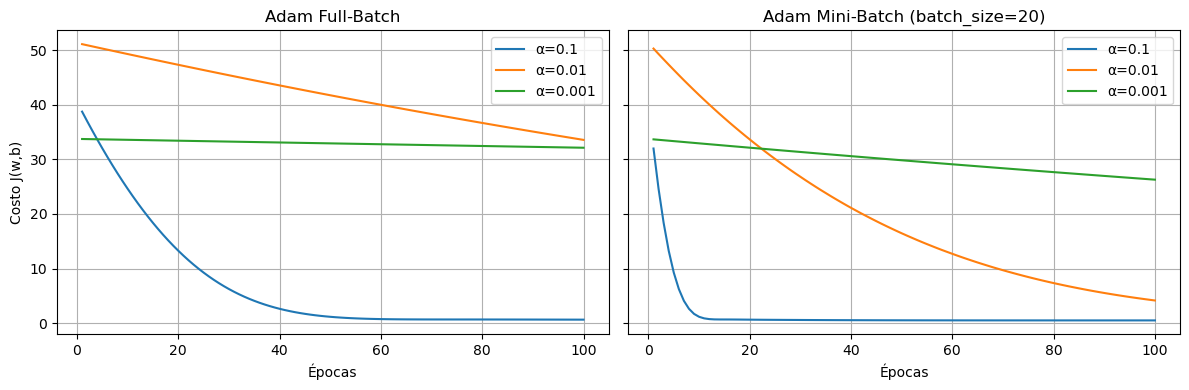

In [18]:
epochs = 100
batch_size = 20

adam_full_hist = {}
adam_mb_hist = {}

for lr in learning_rates:
    w0, b0 = initial_params[lr]

    # Full-batch
    _, _, hist_full = adam_full_batch(
        X, y, w0, b0, lr, epochs
    )
    adam_full_hist[lr] = hist_full

    # Mini-batch
    _, _, hist_mb = adam_mini_batch(
        X, y, w0, b0, lr, epochs, batch_size
    )
    adam_mb_hist[lr] = hist_mb

    print(f"LR={lr}  |  J_full_final={hist_full[-1]:.4f}  |  J_mb_final={hist_mb[-1]:.4f}")

# Gráfica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

for lr in learning_rates:
    ax1.plot(range(1, epochs+1), adam_full_hist[lr], label=f"α={lr}")
    ax2.plot(range(1, epochs+1), adam_mb_hist[lr],   label=f"α={lr}")

ax1.set_title("Adam Full-Batch")
ax1.set_xlabel("Épocas")
ax1.set_ylabel("Costo J(w,b)")
ax1.grid(True)
ax1.legend()

ax2.set_title(f"Adam Mini-Batch (batch_size={batch_size})")
ax2.set_xlabel("Épocas")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


# 1c Comparativa de optimizadores (0.5 puntos)
Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

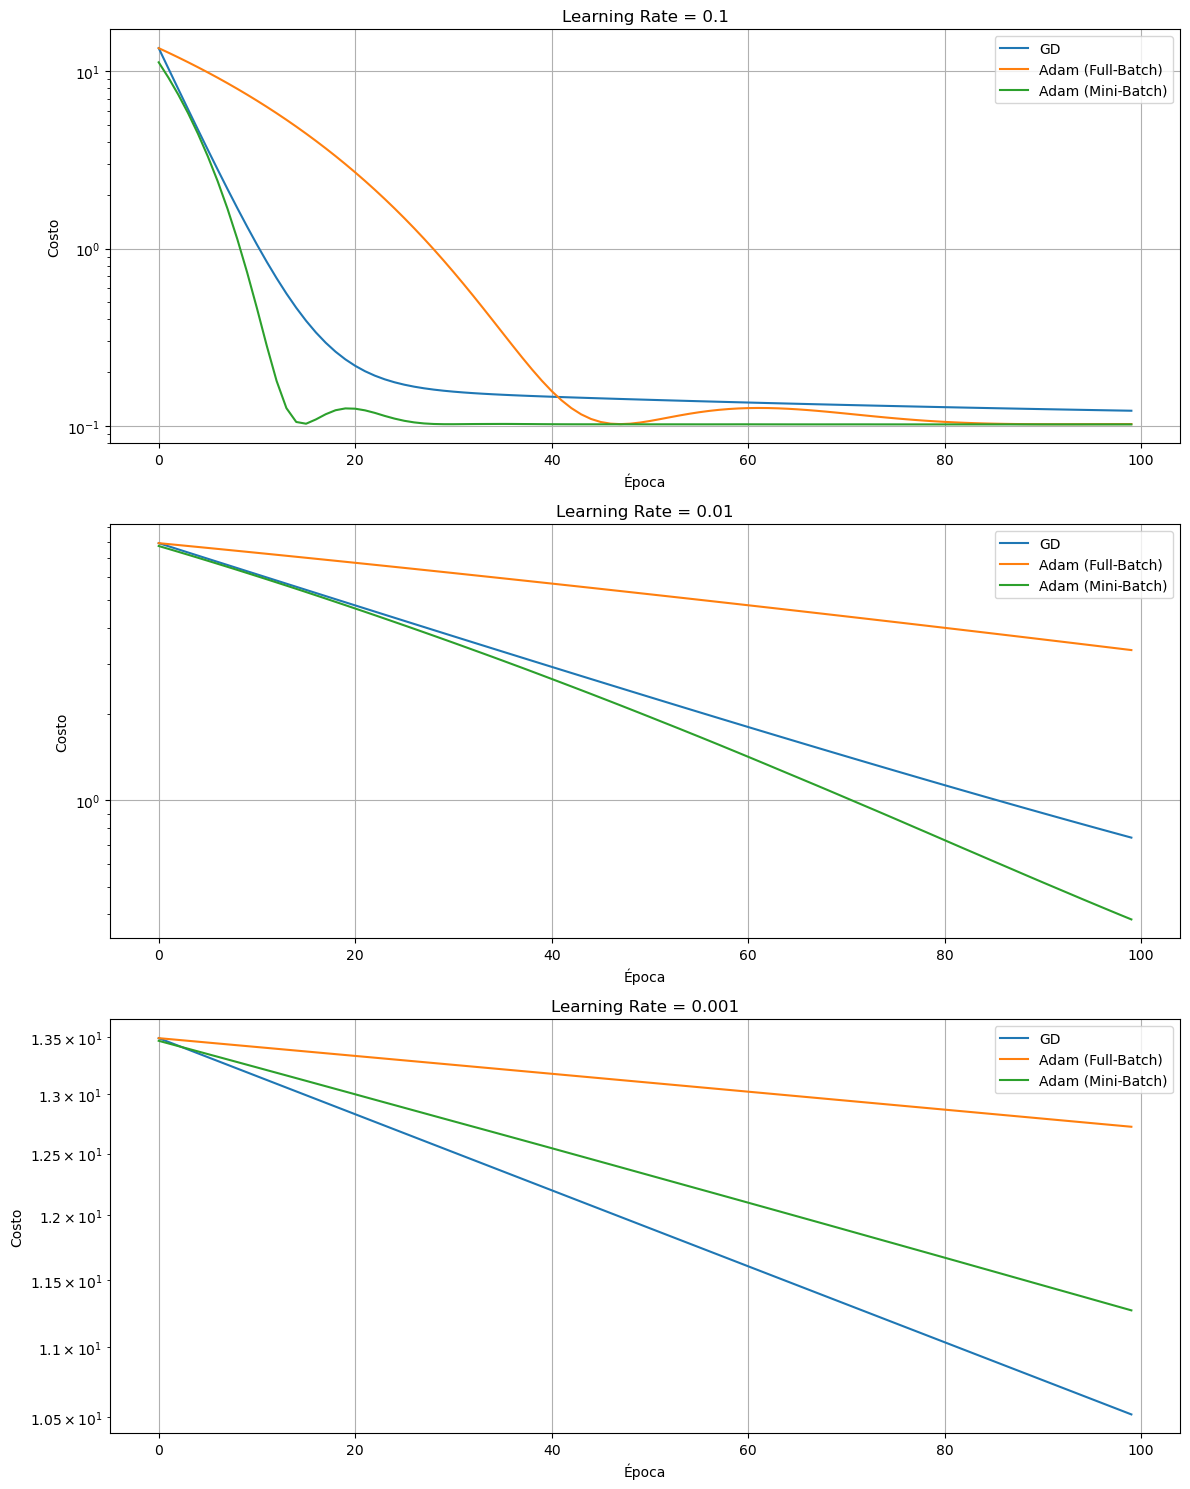

In [19]:
# Generar datos sintéticos
np.random.seed(42)
m = 100
X = np.linspace(0, 1, m).reshape(-1, 1)
y_true = 2 * X + 3
y = y_true + np.random.normal(0, 0.5, size=y_true.shape)

# Hiperparámetros
epochs = 100
learning_rates = [0.1, 0.01, 0.001]
batch_size = 32
n_batches = m // batch_size

# Parámetros Adam
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Configuración de gráficos
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

for i, lr in enumerate(learning_rates):
    # Inicialización común para todos los métodos
    w_init = np.random.randn()
    b_init = np.random.randn()
    
    # Almacenamiento de resultados
    costs = {'GD': [], 'Adam-FB': [], 'Adam-MB': []}
    
    # ===== 1. Gradiente Descendente (Full Batch) =====
    w, b = w_init, b_init
    for epoch in range(epochs):
        y_pred = w * X + b
        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        costs['GD'].append(cost)
        
        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)
        
        w -= lr * dw
        b -= lr * db
    
    # ===== 2. Adam (Full Batch) =====
    w, b = w_init, b_init
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0
    t = 0
    
    for epoch in range(epochs):
        t += 1
        y_pred = w * X + b
        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        costs['Adam-FB'].append(cost)
        
        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)
        
        # Actualización de momentos
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db
        v_w = beta2 * v_w + (1 - beta2) * (dw**2)
        v_b = beta2 * v_b + (1 - beta2) * (db**2)
        
        # Corrección de sesgo
        m_w_hat = m_w / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_w_hat = v_w / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)
        
        # Actualización de parámetros
        w -= lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
    
    # ===== 3. Adam (Mini-Batch) =====
    w, b = w_init, b_init
    m_w, v_w = 0, 0
    m_b, v_b = 0, 0
    t = 0
    
    for epoch in range(epochs):
        # Mezclar datos
        idx = np.random.permutation(m)
        X_shuffled = X[idx]
        y_shuffled = y[idx]
        
        epoch_cost = 0
        for j in range(n_batches):
            t += 1
            # Seleccionar mini-batch
            start = j * batch_size
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            # Calcular gradiente
            y_pred_batch = w * X_batch + b
            error_batch = y_pred_batch - y_batch
            dw = (1/batch_size) * np.dot(X_batch.T, error_batch)
            db = (1/batch_size) * np.sum(error_batch)
            
            # Actualización de momentos
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw**2)
            v_b = beta2 * v_b + (1 - beta2) * (db**2)
            
            # Corrección de sesgo
            m_w_hat = m_w / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_w_hat = v_w / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            
            # Actualización de parámetros
            w -= lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
            b -= lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
        
        # Calcular costo después de la época
        y_pred = w * X + b
        error = y_pred - y
        cost = (1/(2*m)) * np.sum(error**2)
        costs['Adam-MB'].append(cost)
    
    # Graficar resultados para este learning rate
    axs[i].plot(costs['GD'], label='GD')
    axs[i].plot(costs['Adam-FB'], label='Adam (Full-Batch)')
    axs[i].plot(costs['Adam-MB'], label='Adam (Mini-Batch)')
    axs[i].set_title(f'Learning Rate = {lr}')
    axs[i].set_xlabel('Época')
    axs[i].set_ylabel('Costo')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

# 1d Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo  J(w,b) . Se debe elegir un solo learning rate.
Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
Recomiendo utilizar mpl_toolkits.mplot3d y np.meshgrid, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Función de costo y gradientes
def compute_cost(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    return (1/(2*m)) * np.sum((preds - y)**2)

def compute_gradients(w, b, X, y):
    m = X.shape[0]
    preds = w * X + b
    error = preds - y
    dw = (1/m) * np.dot(error, X)
    db = (1/m) * np.sum(error)
    return dw, db

# Datos de ejemplo
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m)
y = 4 + 3*X + np.random.randn(m)

# Parámetros iniciales (mismos para los 3)
w0, b0 = np.random.randn(), np.random.randn()

# Hiperparámetros
alpha = 0.01
epochs = 100
batch_size = 20


In [21]:
def gd_with_history(X, y, w0, b0, alpha, epochs):
    w, b = w0, b0
    ws, bs = [w], [b]
    for _ in range(epochs):
        dw, db = compute_gradients(w, b, X, y)
        w -= alpha * dw
        b -= alpha * db
        ws.append(w); bs.append(b)
    return np.array(ws), np.array(bs)

def adam_full_with_history(X, y, w0, b0, alpha, epochs,
                           beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = v_w = v_b = 0
    ws, bs = [w], [b]
    for t in range(1, epochs+1):
        dw, db = compute_gradients(w, b, X, y)
        m_w = beta1*m_w + (1-beta1)*dw
        m_b = beta1*m_b + (1-beta1)*db
        v_w = beta2*v_w + (1-beta2)*dw**2
        v_b = beta2*v_b + (1-beta2)*db**2
        m_w_hat = m_w/(1-beta1**t)
        m_b_hat = m_b/(1-beta1**t)
        v_w_hat = v_w/(1-beta2**t)
        v_b_hat = v_b/(1-beta2**t)
        w -= alpha * m_w_hat/(np.sqrt(v_w_hat)+eps)
        b -= alpha * m_b_hat/(np.sqrt(v_b_hat)+eps)
        ws.append(w); bs.append(b)
    return np.array(ws), np.array(bs)

def adam_mb_with_history(X, y, w0, b0, alpha, epochs, batch_size,
                        beta1=0.9, beta2=0.999, eps=1e-8):
    w, b = w0, b0
    m_w = m_b = v_w = v_b = 0
    ws, bs = [w], [b]
    m = X.shape[0]
    t = 0
    for _ in range(epochs):
        perm = np.random.permutation(m)
        X_sh, y_sh = X[perm], y[perm]
        for i in range(0, m, batch_size):
            t += 1
            xb = X_sh[i:i+batch_size]; yb = y_sh[i:i+batch_size]
            dw, db = compute_gradients(w, b, xb, yb)
            m_w = beta1*m_w + (1-beta1)*dw
            m_b = beta1*m_b + (1-beta1)*db
            v_w = beta2*v_w + (1-beta2)*dw**2
            v_b = beta2*v_b + (1-beta2)*db**2
            m_w_hat = m_w/(1-beta1**t)
            m_b_hat = m_b/(1-beta1**t)
            v_w_hat = v_w/(1-beta2**t)
            v_b_hat = v_b/(1-beta2**t)
            w -= alpha * m_w_hat/(np.sqrt(v_w_hat)+eps)
            b -= alpha * m_b_hat/(np.sqrt(v_b_hat)+eps)
        ws.append(w); bs.append(b)
    return np.array(ws), np.array(bs)

# Ejecutar
ws_gd, bs_gd = gd_with_history(X, y, w0, b0, alpha, epochs)
ws_af, bs_af = adam_full_with_history(X, y, w0, b0, alpha, epochs)
ws_am, bs_am = adam_mb_with_history(X, y, w0, b0, alpha, epochs, batch_size)


In [22]:
# Rango de w y b para la malla
w_vals = np.linspace(min(ws_gd.min(), ws_af.min(), ws_am.min())-1,
                     max(ws_gd.max(), ws_af.max(), ws_am.max())+1, 100)
b_vals = np.linspace(min(bs_gd.min(), bs_af.min(), bs_am.min())-1,
                     max(bs_gd.max(), bs_af.max(), bs_am.max())+1, 100)

W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([compute_cost(w, b, X, y) for w,b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)


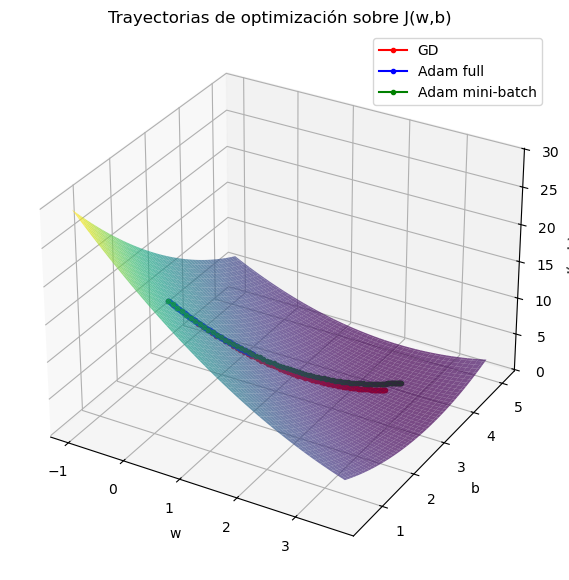

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Superficie de costo
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Trayectorias
ax.plot(ws_gd, bs_gd, [compute_cost(w,b,X,y) for w,b in zip(ws_gd, bs_gd)],
        'r.-', label='GD')
ax.plot(ws_af, bs_af, [compute_cost(w,b,X,y) for w,b in zip(ws_af, bs_af)],
        'b.-', label='Adam full')
ax.plot(ws_am, bs_am, [compute_cost(w,b,X,y) for w,b in zip(ws_am, bs_am)],
        'g.-', label='Adam mini-batch')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')
ax.view_init(elev=30, azim=-60)
ax.legend()
plt.title('Trayectorias de optimización sobre J(w,b)')
plt.show()
